In [1]:
import pandas as pd
train_features = pd.read_csv('https://drive.google.com/uc?export=download&id=14ULvX0uOgftTB2s97uS8lIx1nHGQIB0P')
train_labels = pd.read_csv('https://drive.google.com/uc?export=download&id=1r441wLr7gKGHGLyPpKauvCuUOU556S2f')
test_features = pd.read_csv('https://drive.google.com/uc?export=download&id=1wvsYl9hbRbZuIuoaLWCsW_kbcxCdocHz')
sample_submission = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfJewnmhowpUo381oSn3XqsQ6Eto23XV')
train_features.shape, train_labels.shape, test_features.shape, sample_submission.shape

((59400, 40), (59400, 2), (14358, 40), (14358, 2))

# Assignment
- Learn about the mathematics of Logistic Regression by watching Aaron Gallant's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes).
- Start a clean notebook.
- Do train/validate/test split with the Tanzania Waterpumps data.
- Begin to explore and clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- Select different numeric and categorical features. 
- Do one-hot encoding. (Remember it may not work with high cardinality categoricals.)
- Scale features.
- Use scikit-learn for logistic regression.
- Get your validation accuracy score.
- Get and plot your coefficients.
- Submit your predictions to our Kaggle competition.
- Commit your notebook to your fork of the GitHub repo.

In [2]:
pd.set_option('display.max_columns', 50)
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
train_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [4]:
train_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [5]:
# 20709 0 values for construction year.
train_features.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [6]:
train_features.population.value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
300      1476
100      1146
50       1139
500      1009
350       986
120       916
400       775
60        706
30        626
40        552
80        533
450       499
20        462
600       438
230       388
75        289
1000      278
800       269
90        265
130       264
25        255
320       249
35        245
360       222
140       215
        ...  
8848        1
628         1
4520        1
468         1
693         1
725         1
789         1
821         1
5300        1
3127        1
2345        1
3031        1
886         1
392         1
424         1
2807        1
726         1
694         1
2569        1
4788        1
662         1
4660        1
406         1
1032        1
1160        1
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [7]:
train_features.gps_height.value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
 1290       52
-14         51
 303        51
-18         49
-19         47
 1269       46
 1295       46
 1304       45
-23         45
 280        44
 1538       44
 1286       44
-8          44
-17         44
 1332       43
 320        43
 1317       42
 1293       42
 1319       42
 1359       42
 1264       42
 1288       42
 1401       42
 1303       42
-27         42
         ...  
 2506        1
 2023        1
-53          1
 2364        1
 2332        1
 2402        1
 2236        1
 2420        1
 2291        1
 2407        1
 2080        1
 2250        1
 591         1
 2378        1
 2535        1
 2614        1
 2484        1
 2450        1
 2072        1
 2286        1
 2567        1
 2322        1
 2254        1
 2264        1
 2464        1
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [8]:
train_features.amount_tsh.value_counts()

0.00         41639
500.00        3102
50.00         2472
1000.00       1488
20.00         1463
200.00        1220
100.00         816
10.00          806
30.00          743
2000.00        704
250.00         569
300.00         557
5000.00        450
5.00           376
25.00          356
3000.00        334
1200.00        267
1500.00        197
6.00           190
600.00         176
4000.00        156
2400.00        145
2500.00        139
6000.00        125
7.00            69
8000.00         61
750.00          59
40.00           59
10000.00        57
12000.00        51
             ...  
16000.00         2
16300.00         2
800.00           2
11000.00         2
590.00           2
520.00           2
26000.00         2
13000.00         2
9.00             1
170000.00        1
200000.00        1
900.00           1
0.25             1
53.00            1
350000.00        1
306.00           1
120000.00        1
26.00            1
59.00            1
60000.00         1
5400.00          1
70000.00    

In [9]:
train_features.describe(exclude='number').T.sort_values(by='unique')

,count,unique,top,freq
recorded_by,59400,1,GeoData Consultants Ltd,59400
public_meeting,56066,2,True,51011
permit,56344,2,True,38852
source_class,59400,3,groundwater,45794
management_group,59400,5,user-group,52490
quantity_group,59400,5,enough,33186
quantity,59400,5,enough,33186
waterpoint_type_group,59400,6,communal standpipe,34625
quality_group,59400,6,good,50818
payment_type,59400,7,never pay,25348


In [10]:
train_features.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

# Do train/validate/test split

In [11]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_val, y_train, y_val = train_test_split(
    train_features, train_labels['status_group'],
    train_size=0.8, test_size=0.2, 
    stratify=train_labels['status_group'], 
    random_state=42)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((47520, 40), (11880, 40), (47520,), (11880,))

# Begin to explore and clean the data

# Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

In [13]:
train_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [14]:
# try a subset that has non-zero values for construction_year, amount_tsh, and population

train_features_s1 = train_features[(train_features['construction_year']!=0)&
                                       (train_features['amount_tsh']!=0)&
                                       (train_features['population']!=0)]
train_features_s1.shape

(16557, 40)

In [18]:
# get the corresponding labels
train_labels_s1 = train_labels[train_labels.id.isin(train_features_s1.id)]
train_labels_s1.shape

(16557, 2)

In [19]:
# train/test split for subset 1
X_train_s1, X_val_s1, y_train_s1, y_val_s1 = train_test_split(
    train_features_s1, train_labels_s1['status_group'],
    train_size=0.8, test_size=0.2, 
    stratify=train_labels_s1['status_group'], 
    random_state=42)

X_train_s1.shape, X_val_s1.shape, y_train_s1.shape, y_val_s1.shape

((13245, 40), (3312, 40), (13245,), (3312,))

In [24]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
categorical_features = ['source_class', 'management_group', 'quantity_group', 'waterpoint_type_group',
                       'quality_group', 'source_type', 'extraction_type_class', 'water_quality']
numeric_features = X_train_s1.select_dtypes('number').columns.tolist()
features = categorical_features + numeric_features

X_train_s2 = X_train_s1[features]
X_val_s2 = X_val_s1[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train_s2)
X_val_encoded = encoder.transform(X_val_s2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
model.fit(X_train_scaled, y_train_s1)
print('Validation Accuracy', model.score(X_val_scaled, y_val_s1))

/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  from ipykernel import kernelapp as app


Validation Accuracy 0.7563405797101449


# Get and plot your coefficients

In [26]:
model.coef_

array([[-3.00126687e-03,  2.75716656e-03,  2.72140049e-03,
        -8.85950556e-02,  9.08160492e-02,  3.09359454e-02,
         2.60807769e-02, -1.99348346e-02,  1.39025137e-01,
        -2.56527540e-02,  4.26752062e-02, -3.70721893e-01,
         1.22807269e-01,  8.80125353e-02, -1.76134901e-02,
        -2.07319580e-01,  5.05140366e-02,  3.02161915e-02,
         5.28568384e-03, -1.62058590e-02,  4.93254410e-02,
        -2.71236259e-02,  1.97130198e-02,  4.93151527e-02,
        -5.62974250e-03, -6.74682005e-02,  7.12601577e-03,
        -1.23314764e-02,  7.75425248e-02,  6.38653166e-03,
         2.72140049e-03, -8.77499882e-02, -5.46955603e-02,
         2.02268240e-01, -2.41659410e-02, -5.79287475e-02,
         2.53388295e-02, -4.12839324e-02,  5.28568384e-03,
        -5.04631468e-02,  4.93254410e-02, -2.71236259e-02,
         1.97130198e-02,  1.20003944e-01,  4.93151527e-02,
        -2.16389975e-02,  6.26192679e-02,  3.26103681e-01,
         3.61471786e-01, -7.83134448e-02,  4.65894979e-0

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

In [29]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

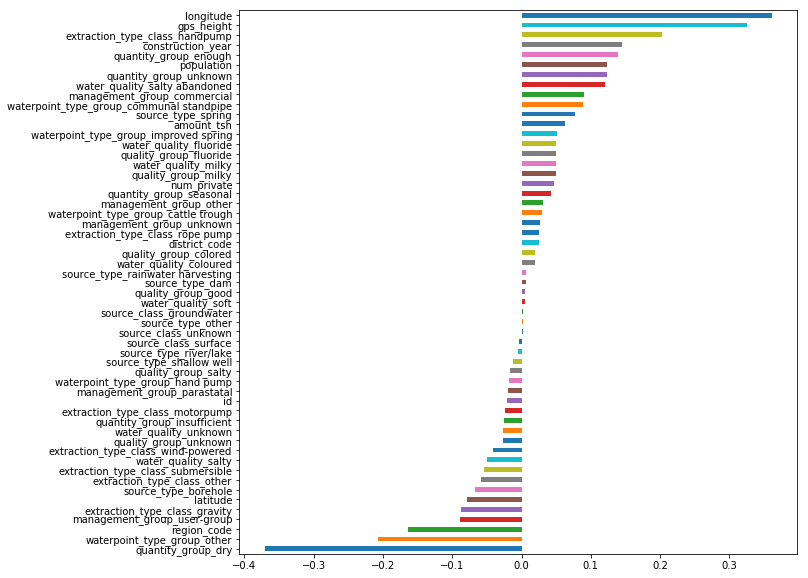

In [30]:
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh();

In [32]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-02.csv', index=False)

In [ ]:
# this model did worse than the previous one: 0.60732 vs 0.65190
# the test score is very different from the validation score -- something went wrong
# maybe training on the subset with non-zero values in the three continuous features made it so that the model 
# doesn't handle the zero values in the test data well

In [36]:
X_train = X_train[features]
X_val = X_val[features]

encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)

model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=5000)
model.fit(X_train_scaled, y_train)
print('Validation Accuracy', model.score(X_val_scaled, y_val))

/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


Validation Accuracy 0.7044612794612795


In [37]:
X_test_subset = test_features[features]
X_test_encoded = encoder.transform(X_test_subset)
X_test_scaled = scaler.transform(X_test_encoded)

/Users/stephensinclair/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
y_pred = model.predict(X_test_scaled)
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('submission-03.csv', index=False)

In [ ]:
# OK. Doing nothing with the continuous variables and one-hot encoding 
# the list of eight categorical variables that seemed important gives
# us a score of 0.70566 on the leaderboard. At least that's a baseline/
# sanity check.

# Maybe tomorrow I'll try replacing the 0's with NaN? Think on whether or
# not there might be a good rationale for replacing them in a certain way.
# And maybe engineer new binary features to encode the presence or ansence
# of suspicious zero-values in important categorical features

In [40]:
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)

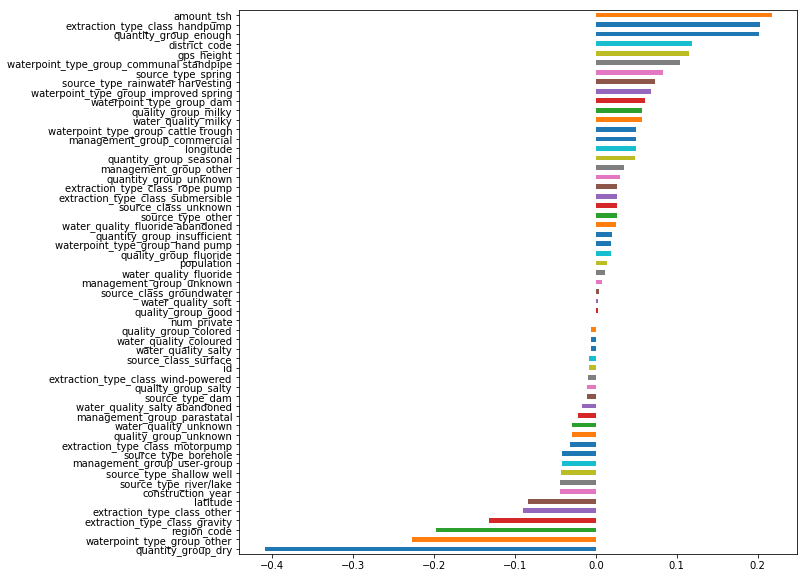

In [41]:
plt.figure(figsize=(10,10))
coefficients.sort_values().plot.barh();